### Approximate SyncRank with sparsified Laplacian 


* 1. [MUN graph](#MUNgraph)
* 2. [ERO graph](#EROgraph)

In [85]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures
using StatsBase#, JLD
using PlotlyJS

### 1. MUN graph  <a id="MUNgraph"></a>

Common parameters

In [86]:
splg_methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    #"DPP(K) LS",
    "iid JL-LS",
    # "iid LS",
    "ST JL-LS",
    # "ST LS",
]

# simulation parameters
n_batch = 6 # maximum number of batches considered
n_rep = 3 # number of runs

# regularization parameter
q = 0
rng = Random.default_rng()

# graph parameters
n = 2000;
p = 0.01;

0.01

least eigval of Laplacian= 0.002422036310836962
k = 

398 vs nb edges= 20095
 
k = 

398 vs nb edges= 20095
 
method: DPP(K) unif


method: DPP(K) JL-LS
method: 

iid JL-LS


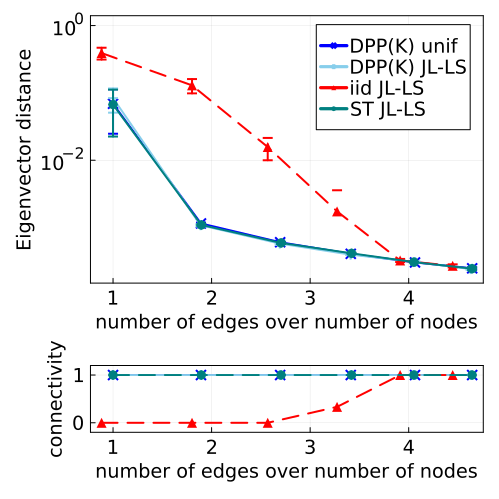

method: ST JL-LS


GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE


"/Users/mfanuel/Documents/Code/juliaTemplate/MagneticLaplacianSparsifier/notebooks/figures/syncrank_err_MUNn2000p0.01eta0.1q0.pdf"

In [87]:
type = "MUN" 

eta = 1e-1# 1e-3

# planted ranking score
planted_score = randperm(rng,n)

# graph model
if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)
D_results = benchmark_syncrank(meta_g,planted_score, n_batch, n_rep, rng; splg_methods)

# plotting distance between eigenvectors
check_connected = true
metric= "err"
y_limits = (1.5*1e-4, 1.4)
legendposition=:topright
plot_comparison_sync(metric,D_results,y_limits;legendposition,splg_methods,check_connected)
name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving plot
Plots.savefig("figures/"*name*".pdf")

# # saving results
# save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

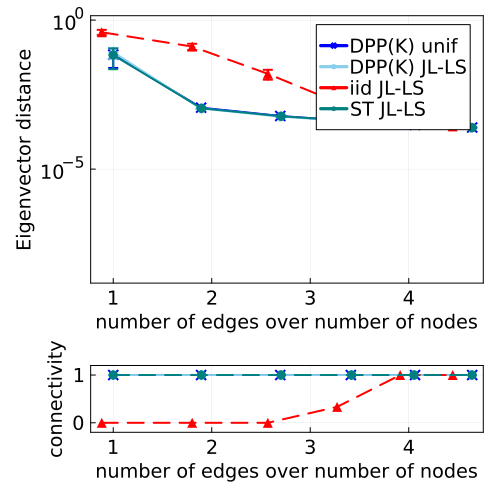

GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE
GKS: Number of points is invalid in routine POLYLINE


"syncrank_err_MUNn2000p0.01eta0.1q0"

In [88]:
# plotting distance between eigenvectors
check_connected = true
metric= "err"
y_limits = (1.5*1e-9, 1.4)
legendposition=:topright
plot_comparison_sync(metric,D_results,y_limits;legendposition,splg_methods,check_connected)
name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

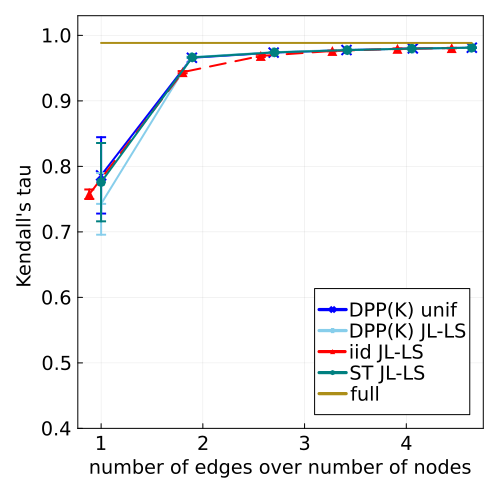

┌ Warning: Skipped yaxis arg linear
└ @ Plots /Users/mfanuel/.julia/packages/Plots/sxUvK/src/axes.jl:76


"/Users/mfanuel/Documents/Code/juliaTemplate/MagneticLaplacianSparsifier/notebooks/figures/syncrank_tau_MUNn2000p0.01eta0.1q0.pdf"

In [89]:
# plotting Kendall's tau between rankings

metric= "tau" 
y_limits = (0.4, 1.03)
legendposition=:bottomright
plot_comparison_sync(metric,D_results,y_limits;legendposition,splg_methods)

name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)
# saving plot
Plots.savefig("figures/"*name*".pdf")

#### Number of cycles

In [90]:
nb_samples = 100
nb_cycles = zeros(nb_samples)
weights_crsf = zeros(nb_samples)
for i_sample in 1:nb_samples
    mtsf = multi_type_spanning_forest(rng, meta_g, q)
    # check nb roots and cycles
    cycles = get_prop(mtsf, :cycle_nodes)
    nb_cycles[i_sample] = length(cycles)
    weights_crsf[i_sample] = get_prop(mtsf, :weight)
end    

cat_nb_cycles = string.(sort(Int.(nb_cycles)))
trace = PlotlyJS.histogram(x=cat_nb_cycles, histnorm="probability density")
layout = Layout(
    autosize=false,
    width=500,
    height=200,
    margin=attr(l=1, r=1, b=1, t=1, pad=4),
    font_size=35,
    xaxis_type="category",
)
plt_cycles = PlotlyJS.plot(trace,layout)
name = "nb_cycles"*type*"eta"*string(eta)*"q"*string(q)
PlotlyJS.savefig(plt_cycles,"figures/"*name*".pdf")

"figures/nb_cyclesMUNeta0.1q0.pdf"

In [91]:
trace = box(y=weights_crsf,
boxpoints="all",
marker=attr(
        color="LightSkyBlue",
        size=1),
quartilemethod="linear",
name="",
marker_color="royalblue",
boxmean=true)

layout = Layout(
    autosize=false,
    width=500,
    height=500,
    margin=attr(l=1, r=1, b=1, t=1, pad=4),
    font_size=20,
)
name = "crsf_weight"*type*"eta"*string(eta)*"q"*string(q)
plt_weight = PlotlyJS.plot(trace,layout)
PlotlyJS.savefig(plt_weight,"figures/"*name*".pdf")

"figures/crsf_weightMUNeta0.1q0.pdf"

### 2. ERO graph  <a id="EROgraph"></a>

least eigval of Laplacian= 0.08634494859120306
k = 

398 vs nb edges= 19959
 
k = 

398 vs nb edges= 19959
 
method: DPP(K) unif


method: DPP(K) JL-LS
method: 

iid JL-LS


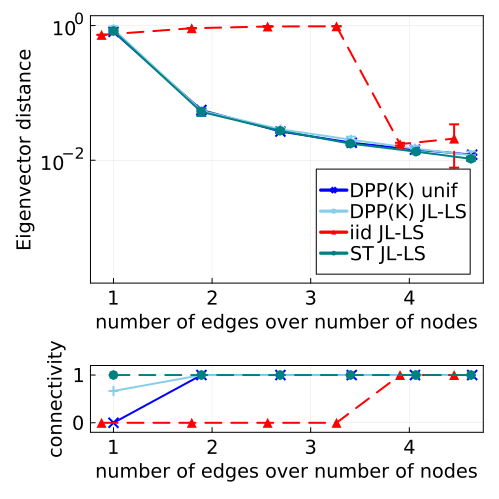

method: ST JL-LS


"/Users/mfanuel/Documents/Code/juliaTemplate/MagneticLaplacianSparsifier/notebooks/figures/syncrank_err_EROn2000p0.01eta0.1q0.pdf"

In [92]:
type = "ERO" 

eta = 0.1
#eta = 0.02
# planted ranking score
planted_score = randperm(rng,n)

# graph model
if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

check_connected = true
hkpv = false
D_results = benchmark_syncrank(meta_g,planted_score, n_batch, n_rep, rng; splg_methods, hkpv)
# plotting distance between eigenvectors
metric= "err"
y_limits = (1.5*1e-4, 1.4)
legendposition=:bottomright
plot_comparison_sync(metric,D_results,y_limits;legendposition,splg_methods,check_connected)
name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# # saving plot
Plots.savefig("figures/"*name*".pdf")

# # saving results
# save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

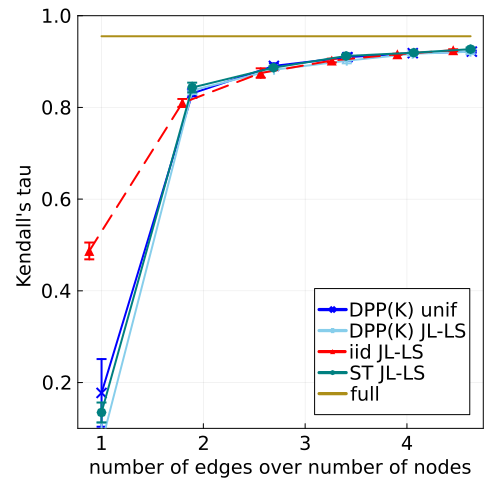

┌ Warning: Skipped yaxis arg linear
└ @ Plots /Users/mfanuel/.julia/packages/Plots/sxUvK/src/axes.jl:76


"/Users/mfanuel/Documents/Code/juliaTemplate/MagneticLaplacianSparsifier/notebooks/figures/syncrank_tau_EROn2000p0.01eta0.1q0.pdf"

In [93]:
# plotting Kendall's tau between rankings
metric= "tau" 
y_limits = (0.1, 1.)
legendposition=:bottomright
plot_comparison_sync(metric,D_results,y_limits;legendposition,splg_methods)

name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)
# saving plot
Plots.savefig("figures/"*name*".pdf")

In [94]:
nb_samples = 100
nb_cycles = zeros(nb_samples)
weights_crsf = zeros(nb_samples)
for i_sample in 1:nb_samples
    mtsf = multi_type_spanning_forest(rng, meta_g, q)
    # check nb roots and cycles
    cycles = get_prop(mtsf, :cycle_nodes)
    nb_cycles[i_sample] = length(cycles)
    weights_crsf[i_sample] = get_prop(mtsf, :weight)
end    

cat_nb_cycles = string.(sort(Int.(nb_cycles)))
trace = PlotlyJS.histogram(x=cat_nb_cycles, histnorm="probability density")
layout = Layout(
    autosize=false,
    width=500,
    height=200,
    margin=attr(l=1, r=1, b=1, t=1, pad=4),
    font_size=35,
    xaxis_type="category",
)
plt_cycles = PlotlyJS.plot(trace,layout)
name = "nb_cycles"*type*"eta"*string(eta)*"q"*string(q)
PlotlyJS.savefig(plt_cycles,"figures/"*name*".pdf")

"figures/nb_cyclesEROeta0.1q0.pdf"

In [95]:
trace = box(y=weights_crsf,
boxpoints="all",
marker=attr(
        color="LightSkyBlue",
        size=1),
quartilemethod="linear",
name="",
marker_color="royalblue",
boxmean=true)

layout = Layout(
    autosize=false,
    width=500,
    height=500,
    margin=attr(l=1, r=1, b=1, t=1, pad=4),
    font_size=20,
)

name = "crsf_weight"*type*"eta"*string(eta)*"q"*string(q)
plt_weight = PlotlyJS.plot(trace,layout)
PlotlyJS.savefig(plt_weight,"figures/"*name*".pdf")

"figures/crsf_weightEROeta0.1q0.pdf"